# TD1 - MNIST và Bitcoin với Feedforward Network

## 1A. MNIST

### Mô tả

Trong phần này, ta dùng Feedforward Network (FFN) để phân loại các chữ số trong tập dữ liệu nổi tiếng <a href="https://toolbox.google.com/datasetsearch/search?query=MNIST%20Database%20(mnist.pkl.gz)&docid=QZBrQgKepkevjOimAAAAAA%3D%3D">MNIST</a>. Ta sử dụng thư viện `keras` để làm việc với các mô hình FFN.

Để download MNIST với keras, ta sử dụng đoạn code sau:

In [1]:
from keras.datasets import mnist
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 19s 2us/step


Tại lần chạy đầu tiên của đoạn code, dữ liệu sẽ được download. Ở các lần chạy sau, dữ liệu sẽ được gọi trực tiếp từ ổ đĩa (không cần download lại).

In [2]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

`X_train_raw`, `y_train_raw` là dữ liệu dùng cho training với 60000 hình ảnh, mỗi ảnh có kích thước 28x28, tương ứng với nhãn là một chữ số từ 0 đến 9. Tương tự có 10000 hình ảnh dùng cho test (`X_test_raw`, `y_test_raw`).

In [7]:
X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Mỗi hình ảnh có dạng đen trắng, trong đó mỗi pixel có giá trị (cường độ) thuộc đoạn [0, 255], 0 tượng trưng cho đen và 255 tượng trưng cho trắng.

In [34]:
print(X_train_raw[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Trong cả TD này, ta sẽ làm việc với dạng chuẩn hoá của các hình ảnh, trong đó thay cường độ các pixel được chia cho 255 và thuộc đoạn [0, 1]. Đồng thời ta sẽ chuyển mỗi hình ảnh về một vector 784 chiều thay cho một array (28 x 28).

In [35]:
X_train = X_train_raw.reshape((60000, 784))/255
X_test = X_test_raw.reshape((10000, 784))/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Ngoài ra, để áp dụng multiclass, classification, ta sẽ biến mỗi nhãn $0, 1, \ldots, 9$ thành các vector 10 thành phần $(t_0, \ldots, t_9)$ trong đó có 1 thành phần duy nhất bằng 1, các thành phần khác bằng 0. 

In [36]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train_raw, 10)
Y_test = np_utils.to_categorical(y_test_raw, 10)

Kiểm tra lại: 

In [37]:
y_train_raw[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [38]:
Y_train[:5] # Các vector này tương ứng với 5 nhãn phía trên

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Bài 1 Multinomial Logistic Regression (Softmax Regression)

Nhắc lại rằng Softmax Regression tương ứng với một FFN với 1 hidden layer, với hàm kích hoạt (activation function) là hàm softmax

và hàm loss được sử dụng là categorical entropy.
$$
L(t, y) = -\sum_{k=1}^K t_k \log(y_k)
$$

($K$ là số lớp trong bài toán phân loại, ở đây là 10).

***Sử dụng `keras`, hãy xây dựng một mô hình (model) theo FFN nêu trên. Lưu mô hình này bằng một tên biến riêng (ví dụ `model1` để so sánh về sau).***

In [89]:
# YOUR CODE HERE

Khi gọi `model1.summary()`, số lượng tham số cần bằng 7850, tương ứng với 784 unit ở input layer + 1 unit tự do, nhân với số unit ở output layer. Bạn có thể dùng đoạn code dưới đây để test.

In [92]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 10)                7850      
_________________________________________________________________
activation_90 (Activation)   (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


***Hãy train với Softmax Regression trên `X_train`, `Y_train` bằng cách chọn ngẫu nhiên 80% để train và 20% cho validation, sau đó dự đoán trên `X_test`, `Y_test`. Sử dụng `np.random.seed(0)` để cố định trạng thái ngẫu nhiên và SGD (các tham số ở dạng default) làm thuật toán tối ưu. Chọn minibatch size là 128. Tính accuracy trên tập train và tập validation sau 20 bước lặp. Lưu lịch sử train bằng một tên biến riêng (ví dụ `history1 = model1.fit(...)`) để sử dụng về sau.***

In [50]:
# YOUR CODE HERE - TRAIN AND VALIDATION

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 62us/step - loss: 1.3437 - acc: 0.6849 - val_loss: 0.8861 - val_acc: 0.8268
Epoch 2/20
48000/48000 [==============================] - 3s 60us/step - loss: 0.7886 - acc: 0.8273 - val_loss: 0.6561 - val_acc: 0.8581
Epoch 3/20
48000/48000 [==============================] - 3s 55us/step - loss: 0.6422 - acc: 0.8492 - val_loss: 0.5615 - val_acc: 0.8692
Epoch 4/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.5706 - acc: 0.8600 - val_loss: 0.5093 - val_acc: 0.8777
Epoch 5/20
48000/48000 [==============================] - 2s 32us/step - loss: 0.5267 - acc: 0.8673 - val_loss: 0.4753 - val_acc: 0.8813
Epoch 6/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.4965 - acc: 0.8719 - val_loss: 0.4510 - val_acc: 0.8878
Epoch 7/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.4742 - acc: 0.8767 - val_loss: 0.4328 - val_acc

In [52]:
# YOUR CODE HERE - PREDICT ON TEST SET

10000/10000 [==============================] - 1s 59us/step


[0.34765567469596864, 0.904]

***Vẽ đồ thị biểu diễn accuracy trên tập train và tập validation theo quá trình train (20 bước)***.

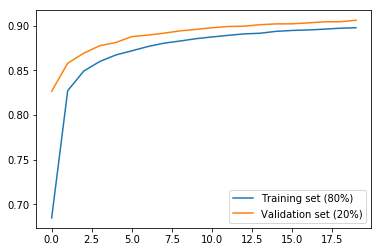

In [53]:
# YOUR CODE HERE - PLOTTING

### Bài 2. FFN 2 tầng - Chọn Hidden Unit

Ta sử dụng model sau: 

- Tầng input: 784 unit (+1 unit tự do) như cũ
- Tầng hidden trung gian: 8, 32, 128 hoặc 512 unit (4 lựa chọn)
- Hàm kích hoạt ở tầng hidden trung gian: relu hoặc sigmoid (2 lựa chọn)
- Tầng output: 10 unit
- Hàm kích hoạt ở tầng output: softmax

- Hàm loss: categorical entropy

***Sử dụng `keras`, hãy xây dựng 8 mô hình (model) theo mô tả nêu trên. Lưu các mô hình này bằng một tên biến riêng (ví dụ `model2A`, ..., `model2H` để so sánh về sau).***

In [58]:
# YOUR CODE HERE - DESIGN MODEL

In [59]:
models2[0].summary() # Kiểm tra với 1 trong 8 mô hình, ở đây lấy biến là models2[0]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 6280      
_________________________________________________________________
activation_38 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                90        
_________________________________________________________________
activation_39 (Activation)   (None, 10)                0         
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [61]:
models2[7].summary() # Kiểm tra với mô hình khác

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_52 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                5130      
_________________________________________________________________
activation_53 (Activation)   (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


***Hãy train với các mô hình trên `X_train`, `Y_train` bằng cách chọn ngẫu nhiên 80% để train và 20% cho validation, sau đó dự đoán trên `X_test`, `Y_test`. Sử dụng `np.random.seed(0)` để cố định trạng thái ngẫu nhiên và SGD (các tham số ở dạng default) làm thuật toán tối ưu. Chọn batch size là 128. Tính accuracy trên tập train và tập validation sau 20 bước lặp. Lưu lịch sử train bằng một tên biến riêng (ví dụ `history2A = model2A.fit(...)`) để sử dụng về sau.***

In [64]:
# YOUR CODE HERE - TRAINING, VALIDATION AND PREDICTION FOR 8 MODELS

10000/10000 [==============================] - 1s 71us/step
Nb Units: 8, activation: relu. Test result: [0.3156051102638245, 0.9067]
10000/10000 [==============================] - 1s 67us/step
Nb Units: 8, activation: sigmoid. Test result: [0.7636615446090699, 0.8321]
10000/10000 [==============================] - 1s 88us/step
Nb Units: 32, activation: relu. Test result: [0.2634596054941416, 0.9269]
10000/10000 [==============================] - 1s 83us/step
Nb Units: 32, activation: sigmoid. Test result: [0.47043792123794553, 0.8912]
10000/10000 [==============================] - 0s 20us/step
Nb Units: 128, activation: relu. Test result: [0.2362924926817417, 0.9344]
10000/10000 [==============================] - 0s 20us/step
Nb Units: 128, activation: sigmoid. Test result: [0.404630801153183, 0.8958]
10000/10000 [==============================] - 0s 48us/step
Nb Units: 512, activation: relu. Test result: [0.22309853385686873, 0.9363]
10000/10000 [==============================] - 1s 5

***Vẽ đồ thị biểu diễn accuracy trên tập train theo quá trình train (20 bước) với từng mô hình trên. Chọn ra cặp tham số tốt nhất cho số unit ở tầng hidden và hàm activation được sử dụng. Biểu diễn số liệu ở dạng DataFrame để so sánh.***.

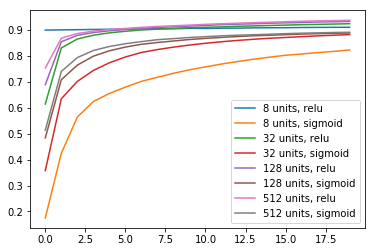

In [74]:
# YOUR CODE HERE - PLOTTING

In [75]:
# YOUR CODE HERE - DATAFRAME

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.897958,0.898958,0.899625,0.900458,0.901354,0.901708,0.902667,0.903375,0.903167,0.904833,0.904271,0.905396,0.905500,0.906667,0.907042,0.907167,0.908083,0.908417,0.908729,0.908896
1,0.175271,0.423792,0.563438,0.623062,0.654167,0.678646,0.700688,0.716354,0.731896,0.745104,0.756521,0.767458,0.777000,0.785958,0.793833,0.801250,0.806042,0.811396,0.816021,0.821688
2,0.613521,0.829438,0.863688,0.878375,0.887271,0.893542,0.898479,0.901729,0.904792,0.907354,0.908958,0.910333,0.912750,0.914229,0.915813,0.917229,0.918896,0.920125,0.921250,0.922667
3,0.357604,0.633583,0.700542,0.742667,0.772229,0.794521,0.811896,0.823146,0.832500,0.840437,0.847271,0.853208,0.858333,0.862729,0.866708,0.869646,0.872854,0.875854,0.878229,0.880771
4,0.687937,0.853250,0.877687,0.888667,0.895292,0.899979,0.904354,0.908042,0.910792,0.913646,0.916083,0.918792,0.920854,0.922396,0.924438,0.925896,0.927271,0.929104,0.929937,0.931500
5,0.483187,0.707063,0.763167,0.797667,0.818396,0.832750,0.843375,0.850313,0.856062,0.861812,0.866167,0.869938,0.873167,0.876229,0.878167,0.880313,0.882792,0.884250,0.885646,0.887021
6,0.752042,0.866917,0.884792,0.893958,0.899917,0.904521,0.908771,0.912188,0.914667,0.917250,0.920229,0.922521,0.924583,0.926646,0.928354,0.930042,0.932083,0.933646,0.934542,0.935958
7,0.512938,0.738896,0.792208,0.819521,0.834896,0.845667,0.853812,0.861083,0.865229,0.869583,0.872812,0.876021,0.878354,0.880208,0.882271,0.884437,0.886042,0.887396,0.888833,0.889708


### Bài 3. FFN 2 tầng. Chọn thuật toán tối ưu

Sau bài 2, ta chọn activation là **`relu`** và số unit là **128**. Bây giờ ta chọn thuật toán tối ưu trong số list sau:

- `SGD (lr = 0.01)`
- `SGD (lr = 0.1)`
- `SGD (lr = 0.1, momentum = 0.9)`
- `Adam (lr = 0.01, beta_1 = 0.9, beta_2 = 0.999)`
- `Adam (lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)`

Ta cần tìm trong các thuật toán này, đâu là thuật toán cho ta sự hội tụ nhanh nhất về một lời giải chấp nhận được (acceptable solution).

***Hãy train với các mô hình trên `X_train`, `Y_train` bằng cách chọn ngẫu nhiên 80% để train và 20% cho validation, sau đó dự đoán trên `X_test`, `Y_test`. Sử dụng `np.random.seed(0)` để cố định trạng thái ngẫu nhiên , chọn batch size là 128. Tính accuracy trên tập train và tập validation sau 20 bước lặp.***


In [83]:
# YOUR CODE HERE - TRAINING AND VALIDATION

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 98us/step - loss: 1.2746 - acc: 0.6952 - val_loss: 0.7083 - val_acc: 0.8508
Epoch 2/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.6107 - acc: 0.8569 - val_loss: 0.4894 - val_acc: 0.8796
Epoch 3/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.4792 - acc: 0.8772 - val_loss: 0.4145 - val_acc: 0.8934
Epoch 4/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.4220 - acc: 0.8875 - val_loss: 0.3762 - val_acc: 0.8978
Epoch 5/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.3883 - acc: 0.8947 - val_loss: 0.3519 - val_acc: 0.9040
Epoch 6/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.3655 - acc: 0.9001 - val_loss: 0.3346 - val_acc: 0.9075
Epoch 7/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.3483 - acc: 0.9040 - val_loss: 0.3211 - val_acc

Epoch 18/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0848 - val_acc: 0.9792
Epoch 19/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0848 - val_acc: 0.9792
Epoch 20/20
10000/10000 [==============================] - 1s 69us/step
Algo 2: [0.07848222643558529, 0.9813]
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 120us/step - loss: 0.3984 - acc: 0.8899 - val_loss: 0.2187 - val_acc: 0.9408
Epoch 2/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.1906 - acc: 0.9456 - val_loss: 0.1596 - val_acc: 0.9553
Epoch 3/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1385 - acc: 0.9605 - val_loss: 0.1337 - val_acc: 0.9625
Epoch 4/20
48000/48000 [==============================] - 2s 51us/step - loss: 0.1078 - acc: 0.9692 - val_loss: 0.1173 - val_acc: 0.9659
Epoch 5/20
4800

***Vẽ đồ thị biểu diễn accuracy trên tập train theo quá trình train (20 bước) với từng mô hình trên. Chọn ra thuật toán (cùng với các tham số tốt nhất) được sử dụng. Biểu diễn các giá trị ở dạng DataFrame để có so sánh cụ thể hơn. Bạn có thể thử với các thuật toán tối ưu khác.***.

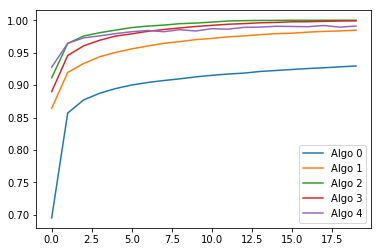

In [88]:
# YOUR CODE HERE - PLOTTING

In [90]:
# YOUR CODE HERE - DATAFRAME

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.695167,0.856875,0.877167,0.887479,0.894708,0.900146,0.904042,0.907062,0.909646,0.912687,0.915042,0.917042,0.918479,0.920979,0.922500,0.924083,0.925521,0.926750,0.928188,0.929438
1,0.864062,0.919521,0.933375,0.943771,0.950396,0.955917,0.960333,0.964417,0.967083,0.970104,0.972042,0.974396,0.975875,0.977729,0.979333,0.980062,0.981667,0.982812,0.983500,0.984667
2,0.911292,0.964229,0.975646,0.980771,0.984812,0.988729,0.991021,0.992542,0.994708,0.995667,0.997146,0.998812,0.999396,0.999687,0.999792,0.999938,0.999938,0.999979,1.000000,1.000000
3,0.889938,0.945583,0.960521,0.969167,0.975625,0.979021,0.982917,0.985688,0.988104,0.990375,0.992146,0.993833,0.994792,0.996083,0.996646,0.997583,0.997708,0.998292,0.998792,0.999021
4,0.927667,0.964396,0.972854,0.975917,0.979417,0.982313,0.984229,0.982292,0.985417,0.983375,0.987000,0.986208,0.989021,0.989396,0.990708,0.990417,0.990042,0.991896,0.989333,0.991042


### Bài 4. Regularization (thực hiện sau Amphi 3)

## 1B. Bitcoin

### Mô tả

Ở TD6 DSC101, ta đã dự đoán độ biến thiên giá Bitcoin sau 1 tuần thông qua Linear và Polynomial Regression trên một số chỉ số tài chính dễ tính. Ta sử dụng file giá bitcoin tại <a href="https://raw.githubusercontent.com/riduan91/DSC111/master/Lesson1/TD/Data/BTCPrice.csv">`Data.csv`</a>. Nhắc lại rằng ở TD6 DSC101 ta đã viết các hàm sau:

In [4]:
import stockstats as sts
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

SHIFT_NUMBER = 7
SKIP = 10
COLUMNS = ['open', 'high', 'low', 'close', 'volume', 'cr', 'cr-ma1', 'cr-ma2', 'cr-ma3', 
           'rsv_9', 'kdjk_9', 'kdjj_9', 'macd', 'macds', 'macdh', 'rs_6', 'rsi_6', 'rs_12', 
           'rsi_12', 'wr_6', 'wr_10', 'cci', 'cci_20', 'tr', 'atr', 'dma', 'high_delta', 'um', 
           'low_delta', 'dm', 'pdm', 'pdm_14', 'pdi_14', 'mdm_14', 'mdi_14', 'dx_14', 
           'adx', 'adxr', 'trix', 'change', 'vr', 'vr_6_sma']

def addTechnicalIndicators(simple_data):
    stock = sts.StockDataFrame(simple_data)
    stock['cr']
    stock['kdjk']
    stock['kdjd']
    stock['kdjj']
    stock['close_10_sma']
    stock['macd']
    stock['boll']
    stock['rsi_6']
    stock['rsi_12']
    stock['wr_6']
    stock['wr_10']
    stock['cci']
    stock['cci_20']
    stock['tr']
    stock['atr']
    stock['dma']
    stock['adxr']
    stock['close_12_ema']
    stock['trix']
    stock['trix_9_sma']
    stock['vr']
    stock['vr_6_sma']
    new_dataframe = pd.DataFrame(stock).loc[:, COLUMNS]
    transformed_dataframe = new_dataframe.iloc[SKIP: len(new_dataframe) - SHIFT_NUMBER] # Bỏ các hàng khuyết dữ liệu
    scaler = StandardScaler()
    scaler.fit(transformed_dataframe)
    return pd.DataFrame(scaler.transform(transformed_dataframe), columns=COLUMNS)

def readAsStockDataFrame(filename):
    data = pd.read_csv(filename, sep=",", names=["timestamp", "open", "high", "low", "close", "volume", "volume currency", "weighted price"], skiprows = 1)
    data = data.loc[:, ["timestamp", "open", "high", "low", "close", "volume"]]
    return addTechnicalIndicators(data)

def getPriceDiff(data, shift_number):
    return np.concatenate((data.loc[:, "Close"].values[shift_number:] * 100 / data.loc[:, "Close"].values[: len(data) - shift_number] - 100, [0] * shift_number))

Như vậy, khi chạy đoạn code sau, ta được dữ liệu là các chỉ số tài chính tương ứng với các ngày giao dịch của Bitcoin.

In [5]:
DATAFILE = "Data/BTCPrice.csv"
X = readAsStockDataFrame(DATAFILE)

D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Users\ndoannguyen\AppData\Local\Continuum\anaconda2\envs\py35\lib\site-packages\stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


In [6]:
X.head(10)

,open,high,low,close,volume,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,...,pdi_14,mdm_14,mdi_14,dx_14,adx,adxr,trix,change,vr,vr_6_sma
0,-0.557662,-0.555577,-0.567160,-0.558149,-0.684977,0.254511,-0.054549,2.535630,9.440731,-0.223739,...,0.512639,-0.389301,-0.390922,-0.017700,0.761042,1.047989,-0.435186,-0.146963,-0.961677,-0.787207
1,-0.557872,-0.555192,-0.568139,-0.558405,-0.154990,0.013675,0.406567,1.990468,6.653909,-0.299411,...,0.109721,-0.386393,-0.291621,-0.491732,0.349655,0.856236,-0.416393,-0.189552,-1.131634,-0.838256
2,-0.557937,-0.556164,-0.569415,-0.562664,-0.298147,-0.298446,0.591809,1.894016,4.221087,-1.745237,...,-0.216358,-0.381915,-0.136020,-1.063830,-0.155752,0.554994,-0.428084,-0.902234,-1.235631,-0.847340
3,-0.562264,-0.559159,-0.572859,-0.563380,0.127178,-0.620990,0.687280,1.880327,3.147333,-1.804377,...,-0.477820,-0.363203,0.573056,-0.839978,-0.428006,0.253150,-0.457949,-0.275354,-1.344351,-1.097693
4,-0.562965,-0.560509,-0.571985,-0.564381,-0.638554,-0.664228,0.828384,1.773829,2.466648,-2.103575,...,-0.617778,-0.371092,0.349826,-0.839978,-0.620778,-0.023577,-0.499683,-0.328561,-1.381465,-1.223595
5,-0.563976,-0.561813,-0.595409,-0.586909,3.824167,-1.288034,0.511783,1.623167,1.930341,-2.592556,...,-1.126243,-0.221296,3.730147,1.360778,0.066295,0.003966,-0.640604,-4.326138,-1.567069,-1.352342
6,-0.586539,-0.573525,-0.598206,-0.578192,2.155016,-1.342460,0.037690,0.660938,1.835456,-1.381047,...,-1.280835,-0.231281,2.899891,1.440978,0.584858,0.192286,-0.787193,1.786625,-1.259720,-1.405244
7,-0.577642,-0.573813,-0.589815,-0.580379,-0.096608,-1.233583,-0.280532,0.230979,1.821989,-1.509907,...,-1.339793,-0.257860,2.363016,1.440978,0.954091,0.446360,-0.933997,-0.594695,-1.307641,-1.436485
8,-0.580215,-0.574633,-0.590644,-0.578652,-0.286669,-1.223358,-0.604645,0.224193,1.717222,-1.267710,...,-1.391286,-0.275034,2.026806,1.468815,1.227612,0.716232,-1.062485,0.218046,-1.228005,-1.435132
9,-0.578405,-0.575123,-0.589959,-0.581480,-0.258532,-1.218921,-0.889590,0.154650,1.569007,-1.613064,...,-1.430845,-0.294892,1.652392,1.468815,1.422671,0.971971,-1.181011,-0.729020,-1.268552,-1.421677


In [8]:
y_raw = getPriceDiff(pd.read_csv(DATAFILE, sep=","), SHIFT_NUMBER)
y = y_raw[SKIP: len(y_raw) - 7]
len(y), len(X) #Dữ liệu cần có số dòng giống nhau

(715, 715)

### Bài 1. Polynomial Regression

***Thực hiện lại việc train với Polynomial Regression với regularization l1, hệ số phạt `alpha` = 0.1, với `random_state = 0` khi dùng `train_test_split` và dùng 50% dữ liệu để validation. Tính RSE (bình phương của RMSE).*** 

In [15]:
# YOUR CODE HERE. TRAINING WITH VALIDATION SET SIZE = 50%

Nb_iterations used:  15170
TrainMSE:  29.994188126537928
ValidationMSE:  87.41474630003407


***Giảm size của tập validation còn 20% và tính lại RSE trên các tập train, validation.*** 

In [19]:
# YOUR CODE HERE. TRAINING WITH VALIDATION SET SIZE = 20%

Nb_iterations used:  17747
TrainMSE:  39.21048873914117
ValidationMSE:  59.856822857924


Nhận xét: Bài toán của ta gặp phải vấn đề thiếu dữ liệu trong khi thuật toán sử dụng phức tạp. Overfitting giảm khi số lượng dữ liệu dùng cho huấn luyện tăng lên. 

### Bài 2. FFN 2 tầng

## References

[1] <a href="https://toolbox.google.com/datasetsearch/search?query=MNIST%20Database%20(mnist.pkl.gz)&docid=QZBrQgKepkevjOimAAAAAA%3D%3D">MNIST data set</a>

[2] *Antonio Gulli*, Deep Learning with Keras

[3] <a href="https://keras.io">Keras Documentation</a>